In [72]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from functions import *
from optimizers import *
from applications import *
from projectors import *

### Quadratic

In [108]:
f, x0, L2, fopt = quadratic(n=100, r=25, condidtion_number=1e3, noise=0.0)

h = SquaredL2Norm()
max_iters = 1000
max_runtime = 300
depth = 5
depth_ = 15
reg = 1e-15

### m

In [74]:
Fx_eam_m = []
Fx_ea_m = []

Fx_aa_m = []
Fx_aao_m = []

for mm in range(1,16):
    xs_ea, Fx_ea, Tx_ea = AA_AEGD(x0, max_iters, mm, h, f, 1./L2, c=9, reg=reg, max_runtime=max_runtime)
    xs_eam, Fx_eam, Tx_eam = AA_AEGD_on(x0, max_iters, mm, h, f, 1./L2, c=9, reg=reg, max_runtime=max_runtime)
    Fx_ea_m.append(Fx_ea)
    Fx_eam_m.append(Fx_eam)

    xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, mm, h, f, 1./L2, reg=reg, max_runtime=max_runtime)
    xs_aao, Fx_aao, Tx_aao = AA_BPG_on(x0, max_iters, mm, h, f, 1./L2, reg=reg, max_runtime=max_runtime)
    Fx_aa_m.append(Fx_aa)
    Fx_aao_m.append(Fx_aao)

AA-PGA(1), iteration:235
AA-PGA_q(1), iteration:235
AA-AEGD(2), iteration:195
AA-AEGD_q(2), iteration:198
AA-PGA_q(2), iteration:196
AA-AEGD_q(3), iteration:182
AA-PGA(3), iteration:263
AA-PGA_q(3), iteration:161
AA-AEGD(4), iteration:262
AA-AEGD_q(4), iteration:158
AA-PGA_q(4), iteration:170
AA-AEGD(5), iteration:162
AA-AEGD_q(5), iteration:160
AA-PGA(5), iteration:160
AA-PGA_q(5), iteration:157
AA-AEGD(6), iteration:722
AA-AEGD_q(6), iteration:152
AA-PGA(6), iteration:629
AA-PGA_q(6), iteration:158
AA-AEGD(7), iteration:134
AA-AEGD_q(7), iteration:149
AA-PGA(7), iteration:133
AA-PGA_q(7), iteration:156
AA-AEGD(8), iteration:137
AA-AEGD_q(8), iteration:138
AA-PGA(8), iteration:669
AA-PGA_q(8), iteration:154
AA-AEGD(9), iteration:403
AA-AEGD_q(9), iteration:155
AA-PGA(9), iteration:115
AA-PGA_q(9), iteration:132
AA-AEGD(10), iteration:123
AA-AEGD_q(10), iteration:132
AA-PGA(10), iteration:280
AA-PGA_q(10), iteration:122
AA-AEGD(11), iteration:426
AA-AEGD_q(11), iteration:112
AA-PGA(11)

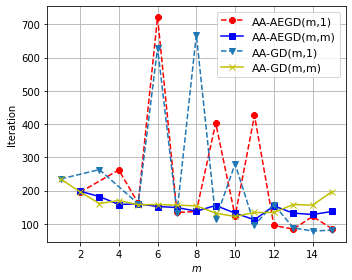

In [75]:
optval = fopt

ea_m_iter = []
eam_m_iter = []
aa_m_iter = []
aao_m_iter = []

m1 = []
m2 = []
m3 = []
m4 = []

fig2 = plt.figure(figsize=(5,4))
for i in range(len(Fx_eam_m)):
    k1 = 1
    k2 = 1
    k3 = 1
    k4 = 1
    for f in Fx_ea_m[i]:
        k1 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-AEGD({i+1}), iteration:{k1}')
            ea_m_iter.append(k1)
            m1.append(i+1)
            break
    for f in Fx_eam_m[i]:
        k2 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-AEGD_q({i+1}), iteration:{k2}')
            eam_m_iter.append(k2)
            m2.append(i+1)
            break

    for f in Fx_aa_m[i]:
        k3 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-PGA({i+1}), iteration:{k3}')
            aa_m_iter.append(k3)
            m3.append(i+1)
            break
    for f in Fx_aao_m[i]:
        k4 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-PGA_q({i+1}), iteration:{k4}')
            aao_m_iter.append(k4)
            m4.append(i+1)
            break

plt.plot(m1, ea_m_iter, c='r', label=f'AA-AEGD(m,1)', marker='8', ls='--')
plt.plot(m2, eam_m_iter, c='b', label=f'AA-AEGD(m,m)', marker='s')
plt.plot(m3, aa_m_iter, c='#1f77b4', label=f'AA-GD(m,1)', marker='v', ls='--')
plt.plot(m4, aao_m_iter, c='y', label=f'AA-GD(m,m)', marker='x')

plt.xlabel("$m$")
plt.ylabel("Iteration")
plt.yscale('linear')

plt.legend(loc=0, prop={'size': 11})
plt.grid()
plt.tight_layout()
plt.rcParams.update({'font.size': 11})
plt.savefig('plot/quad_m_2.png', dpi=300)

### eta

In [109]:
Fx_ea_eta = []
Fx_eam_eta = []

Fx_aa_eta = []
Fx_aao_eta = []

eta_list = [0.1*i/L2 for i in range(1, 20)]

for eta in eta_list:
    xs_ea, Fx_ea, Tx_ea = AA_AEGD(x0, max_iters, 5, h, f, eta, c=9, reg=reg, max_runtime=max_runtime)
    xs_eam, Fx_eam, Tx_eam = AA_AEGD_on(x0, max_iters, 5, h, f, eta, c=9, reg=reg, max_runtime=max_runtime)
    Fx_ea_eta.append(Fx_ea)
    Fx_eam_eta.append(Fx_eam)

    xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, 5, h, f, eta, reg=reg, max_runtime=max_runtime)
    xs_aao, Fx_aao, Tx_aao = AA_BPG_on(x0, max_iters, 5, h, f, eta, reg=reg, max_runtime=max_runtime)
    Fx_aa_eta.append(Fx_aa)
    Fx_aao_eta.append(Fx_aao)

AA-PGA(5), 0.10000000000000003, iteration:551
AA-AEGD(5), 0.10000000000000003, iteration:187
AA-PGA(5), 0.10000000000000003, iteration:402
AA-PGA_q(1), 0.10000000000000003, iteration:172
AA-PGA(5), 0.20000000000000007, iteration:297
AA-AEGD(5), 0.20000000000000007, iteration:182
AA-PGA(5), 0.20000000000000007, iteration:268
AA-PGA_q(2), 0.20000000000000007, iteration:167
AA-PGA(5), 0.30000000000000016, iteration:276
AA-AEGD(5), 0.30000000000000016, iteration:187
AA-PGA(5), 0.30000000000000016, iteration:254
AA-PGA_q(3), 0.30000000000000016, iteration:172
AA-PGA(5), 0.40000000000000013, iteration:259
AA-AEGD(5), 0.40000000000000013, iteration:187
AA-PGA(5), 0.40000000000000013, iteration:242
AA-PGA_q(4), 0.40000000000000013, iteration:172
AA-PGA(5), 0.5000000000000002, iteration:206
AA-AEGD(5), 0.5000000000000002, iteration:177
AA-PGA(5), 0.5000000000000002, iteration:221
AA-PGA_q(5), 0.5000000000000002, iteration:182
AA-PGA(5), 0.6000000000000003, iteration:177
AA-AEGD(5), 0.6000000000

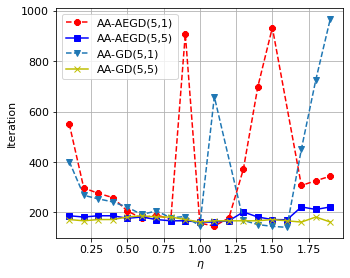

In [110]:
optval = fopt

ea_eta_iter = []
eam_eta_iter = []
aa_eta_iter = []
aao_eta_iter = []

eta1 = []
eta2 = []
eta3 = []
eta4 = []

fig3 = plt.figure(figsize=(5,4))
for i in range(len(Fx_eam_eta)):
    k1 = 1
    k2 = 1
    k3 = 1
    k4 = 1
    for f in Fx_ea_eta[i]:
        k1 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-PGA({5}), {eta_list[i]}, iteration:{k1}')
            ea_eta_iter.append(k1)
            eta1.append(eta_list[i])
            break
    for f in Fx_eam_eta[i]:
        k2 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-AEGD({5}), {eta_list[i]}, iteration:{k2}')
            eam_eta_iter.append(k2)
            eta2.append(eta_list[i])
            break

    for f in Fx_aa_eta[i]:
        k3 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-PGA({5}), {eta_list[i]}, iteration:{k3}')
            aa_eta_iter.append(k3)
            eta3.append(eta_list[i])
            break
    for f in Fx_aao_eta[i]:
        k4 += 1
        if f - optval <= (1)*10e-13:
            print(f'AA-PGA_q({i+1}), {eta_list[i]}, iteration:{k4}')
            aao_eta_iter.append(k4)
            eta4.append(eta_list[i])
            break

plt.plot(eta1, ea_eta_iter, c='r', label='AA-AEGD(5,1)', marker='8', ls='--')
plt.plot(eta2, eam_eta_iter, c='b', label='AA-AEGD(5,5)', marker='s')
plt.plot(eta3, aa_eta_iter, c='#1f77b4', label=f'AA-GD(5,1)', marker='v', ls='--')
plt.plot(eta4, aao_eta_iter, c='y', label=f'AA-GD(5,5)', marker='x')

plt.xlabel("$\eta$")
plt.ylabel("Iteration")
plt.yscale('linear')

plt.legend(loc=0, prop={'size': 11})
plt.grid()
plt.tight_layout()
plt.rcParams.update({'font.size': 11})
plt.savefig('plot/quad_eta_2.png', dpi=300)